In [1]:
import pandas as pd

In [5]:
df = pd.read_csv(filepath_or_buffer="data.csv", sep=",", header=0, index_col=0)

df

,Spatphyllum,Maranta,Convolvulus,Fabaceae,Asteraceae,Cosmo
Osiris,0,1,0,0,1,0
Eulaema,1,0,0,0,0,0
Melipona,0,0,0,0,0,1
Bombus,0,0,1,0,0,1
Euglossa,1,0,1,0,0,0
Eufriesea,0,0,1,0,0,0


In [8]:
import networkx as nx

In [9]:
G = nx.Graph()

In [10]:
G.add_nodes_from(df.index.to_list(), bipartite=0)
G.add_nodes_from(df.columns.to_list(),bipartite=1)

In [30]:
def matrix_to_json_data(df: pd.DataFrame) -> "dict[str,list[str]]":

    json_data = dict()

    for index in df.index:
        values = []
        for col in df.columns:
            if df.loc[index][col] == 1:
                values.append(col)
        json_data[index] = values

    return json_data

In [35]:
def matrix_to_pairs(df: pd.DataFrame) -> "list[tuple[str,str]]":
    pairs = []
    for index in df.index:
        for col in df.columns:
            if df.loc[index][col] == 1:
                pairs.append((index, col))
    return pairs

In [36]:
matrix_to_pairs(df=df)

[('Osiris', 'Maranta'),
 ('Osiris', 'Asteraceae'),
 ('Eulaema', 'Spatphyllum'),
 ('Melipona', 'Cosmo'),
 ('Bombus', 'Convolvulus'),
 ('Bombus', 'Cosmo'),
 ('Euglossa', 'Spatphyllum'),
 ('Euglossa', 'Convolvulus'),
 ('Eufriesea', 'Convolvulus')]

In [37]:
edges = matrix_to_pairs(df=df)
G.add_edges_from(edges)

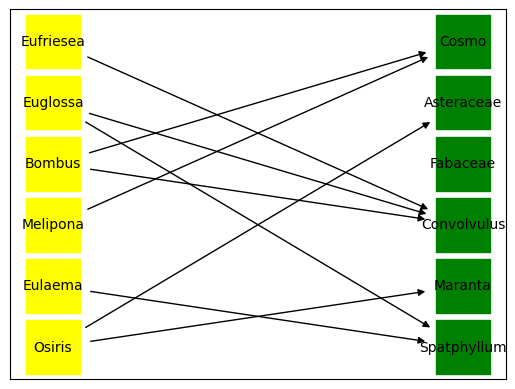

In [107]:
colors = [
    * len(df.index)*["#FFFF00"],
    * len(df.columns)*["#008000"],
]

nx.draw_networkx(
    G=G,
    pos=nx.drawing.layout.bipartite_layout(G, df.index.to_list()),
    arrows=True,
    arrowstyle="-|>",
    node_size=1500,
    node_color=colors,
    node_shape="s",
    alpha=1.,
    width=1.,
    font_size=10,
)